# Isolation Forest

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('earthquakes_cleaned.csv')

# Display the first few rows of the dataset
df.head()


,tgl,ot,lat,lon,depth,mag,remark,datetime,year,month,day,hour,minute
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,2008-11-01 21:02:43.058,2008,11,1,21,2
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,2008-11-01 20:58:50.248,2008,11,1,20,58
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,2008-11-01 17:43:12.941,2008,11,1,17,43
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,2008-11-01 16:24:14.755,2008,11,1,16,24
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,2008-11-01 16:20:37.327,2008,11,1,16,20


# Isolation Forest

In [2]:
# Import required libraries
from sklearn.ensemble import IsolationForest
import pandas as pd

features = ['lat', 'lon', 'depth', 'mag']  # Feature columns

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model to the data
iso_forest.fit(df[features])

# Predict anomalies
df['anomaly_iso'] = iso_forest.predict(df[features])

# Map the output to more readable format
df['anomaly_iso'] = df['anomaly_iso'].map({1: 'Normal', -1: 'Anomaly'})

# Count the number of anomalies detected
anomalies_iso = df[df['anomaly_iso'] == 'Anomaly']
print(f'Number of anomalies detected by Isolation Forest: {len(anomalies_iso)}')

# Display the anomalies
print(anomalies_iso[['lat', 'lon', 'depth', 'mag', 'remark', 'datetime']])


Number of anomalies detected by Isolation Forest: 4645
        lat     lon  depth  mag                        remark  \
21     3.06  121.83    588  4.4                   Celebes Sea   
26     3.96  126.71    306  4.4    Talaud Islands - Indonesia   
35     1.10   97.34     39  5.5  Northern Sumatra - Indonesia   
64     3.60   97.19    142  3.4  Northern Sumatra - Indonesia   
73    -5.15  128.73    270  3.4                     Banda Sea   
...     ...     ...    ...  ...                           ...   
92723 -2.62  102.43    184  3.3  Southern Sumatra - Indonesia   
92749 -5.42  106.66    281  3.4              Java - Indonesia   
92836 -3.52  140.65    117  2.8        Irian Jaya - Indonesia   
92858 -4.94  130.01    215  3.1                     Banda Sea   
92876 -7.23  110.20    240  3.8              Java - Indonesia   

                      datetime  
21     2008-11-02 21:59:16.852  
26     2008-11-02 00:10:37.651  
35     2008-11-03 19:22:03.486  
64     2008-11-07 22:36:26.841  

# One-Class SVM

In [3]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Standardize the data to ensure better performance of the SVM
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Initialize One-Class SVM
svm_model = OneClassSVM(kernel='rbf', nu=0.05, gamma='auto')

# Fit the model to the scaled data
svm_model.fit(scaled_features)

# Predict anomalies
df['anomaly_svm'] = svm_model.predict(scaled_features)

# Map the output to more readable format
df['anomaly_svm'] = df['anomaly_svm'].map({1: 'Normal', -1: 'Anomaly'})

# Count the number of anomalies detected
anomalies_svm = df[df['anomaly_svm'] == 'Anomaly']
print(f'Number of anomalies detected by One-Class SVM: {len(anomalies_svm)}')

# Display the anomalies
print(anomalies_svm[['lat', 'lon', 'depth', 'mag', 'remark', 'datetime']])


Number of anomalies detected by One-Class SVM: 4651
        lat     lon  depth  mag                          remark  \
21     3.06  121.83    588  4.4                     Celebes Sea   
26     3.96  126.71    306  4.4      Talaud Islands - Indonesia   
70    -6.76  129.37     39  6.2                       Banda Sea   
87     0.32  105.29    292  5.3                 South China Sea   
104   -7.25  121.00    650  4.5                      Flores Sea   
...     ...     ...    ...  ...                             ...   
92808 -3.51  141.46     17  3.4   New Guinea - Papua New Guinea   
92836 -3.52  140.65    117  2.8          Irian Jaya - Indonesia   
92872  3.09  127.08     10  5.7      Talaud Islands - Indonesia   
92873  3.09  127.08     10  5.7      Talaud Islands - Indonesia   
92881 -2.43  140.70     10  2.5  Near North Coast of Irian Jaya   

                      datetime  
21     2008-11-02 21:59:16.852  
26     2008-11-02 00:10:37.651  
70     2008-11-07 16:04:27.451  
87     2008

# Elliptic Envelope

In [7]:
from sklearn.covariance import EllipticEnvelope
# Select numerical columns for Elliptic Envelope model (you can adjust based on which columns you want to include)
features = ['lat', 'lon', 'depth', 'mag']
X = df[features]

# Initialize the Elliptic Envelope model
elliptic_env = EllipticEnvelope(contamination=0.01)  # Assuming we expect 1% anomalies in the dataset

# Fit the model on the selected features
elliptic_env.fit(X)

EllipticEnvelope(contamination=0.01)

In [9]:
# Predict anomalies using Elliptic Envelope
df['anomaly_elliptic'] = elliptic_env.predict(X)

# Convert predictions into a readable format
df['anomaly_elliptic'] = df['anomaly_elliptic'].map({1: 'Normal', -1: 'Anomaly'})

# Count the anomalies detected
anomalies_elliptic = df[df['anomaly_elliptic'] == 'Anomaly']
print(f'Total number of anomalies detected by Elliptic Envelope: {len(anomalies_elliptic)}')


Total number of anomalies detected by Elliptic Envelope: 929


In [10]:
# Display the anomalies detected by Elliptic Envelope
print(anomalies_elliptic[['lat', 'lon', 'depth', 'mag', 'remark', 'datetime']])


        lat     lon  depth  mag                remark                 datetime
21     3.06  121.83    588  4.4           Celebes Sea  2008-11-02 21:59:16.852
104   -7.25  121.00    650  4.5            Flores Sea  2008-11-10 07:59:48.643
146    2.29  124.73    650  5.1           Celebes Sea  2008-11-23 08:01:24.185
147   -5.00  115.99    551  4.9              Java Sea  2008-11-24 09:39:16.510
148    1.10  125.58    650  5.6  Northern Molucca Sea  2008-11-24 09:10:49.164
...     ...     ...    ...  ...                   ...                      ...
92042  4.02  122.90    554  5.1           Celebes Sea  2023-01-07 05:21:57.724
92109 -7.25  125.18    443  4.6             Banda Sea  2023-01-09 07:23:01.005
92537 -6.30  125.45    552  5.1             Banda Sea  2023-01-19 11:56:52.215
92607 -7.55  123.04    544  4.8             Banda Sea  2023-01-20 03:40:32.826
92720 -6.91  126.77    426  4.5             Banda Sea  2023-01-23 13:29:36.362

[929 rows x 6 columns]


# Visualize Anomalies


In [11]:
# Compare Elliptic Envelope anomalies with Isolation Forest and One-Class SVM anomalies
anomalies_iso = df[df['anomaly_iso'] == 'Anomaly']
anomalies_svm = df[df['anomaly_svm'] == 'Anomaly']

print(f'Isolation Forest Anomalies: {len(anomalies_iso)}')
print(f'One-Class SVM Anomalies: {len(anomalies_svm)}')
print(f'Elliptic Envelope Anomalies: {len(anomalies_elliptic)}')

# Display the intersection between different models
anomalies_overlap = anomalies_elliptic.merge(anomalies_iso, on=['lat', 'lon', 'depth', 'mag'], how='inner')
print(f'Common anomalies between Elliptic Envelope and Isolation Forest: {len(anomalies_overlap)}')

anomalies_overlap_svm = anomalies_elliptic.merge(anomalies_svm, on=['lat', 'lon', 'depth', 'mag'], how='inner')
print(f'Common anomalies between Elliptic Envelope and One-Class SVM: {len(anomalies_overlap_svm)}')


Isolation Forest Anomalies: 4645
One-Class SVM Anomalies: 4651
Elliptic Envelope Anomalies: 929
Common anomalies between Elliptic Envelope and Isolation Forest: 1061
Common anomalies between Elliptic Envelope and One-Class SVM: 861


In [12]:
# compare the anomalies detected by Isolation Forest and One-Class SVM
print('Anomalies detected by Isolation Forest:')
print(anomalies_iso[['lat', 'lon', 'depth', 'mag', 'remark', 'datetime']])
print('\nAnomalies detected by One-Class SVM:')
print(anomalies_svm[['lat', 'lon', 'depth', 'mag', 'remark', 'datetime']])
print ('\nAnomalies detected by Elliptic Envelope:')
print(anomalies_elliptic[['lat', 'lon', 'depth', 'mag', 'remark', 'datetime']])


Anomalies detected by Isolation Forest:
        lat     lon  depth  mag                        remark  \
21     3.06  121.83    588  4.4                   Celebes Sea   
26     3.96  126.71    306  4.4    Talaud Islands - Indonesia   
35     1.10   97.34     39  5.5  Northern Sumatra - Indonesia   
64     3.60   97.19    142  3.4  Northern Sumatra - Indonesia   
73    -5.15  128.73    270  3.4                     Banda Sea   
...     ...     ...    ...  ...                           ...   
92723 -2.62  102.43    184  3.3  Southern Sumatra - Indonesia   
92749 -5.42  106.66    281  3.4              Java - Indonesia   
92836 -3.52  140.65    117  2.8        Irian Jaya - Indonesia   
92858 -4.94  130.01    215  3.1                     Banda Sea   
92876 -7.23  110.20    240  3.8              Java - Indonesia   

                      datetime  
21     2008-11-02 21:59:16.852  
26     2008-11-02 00:10:37.651  
35     2008-11-03 19:22:03.486  
64     2008-11-07 22:36:26.841  
73     2008-11

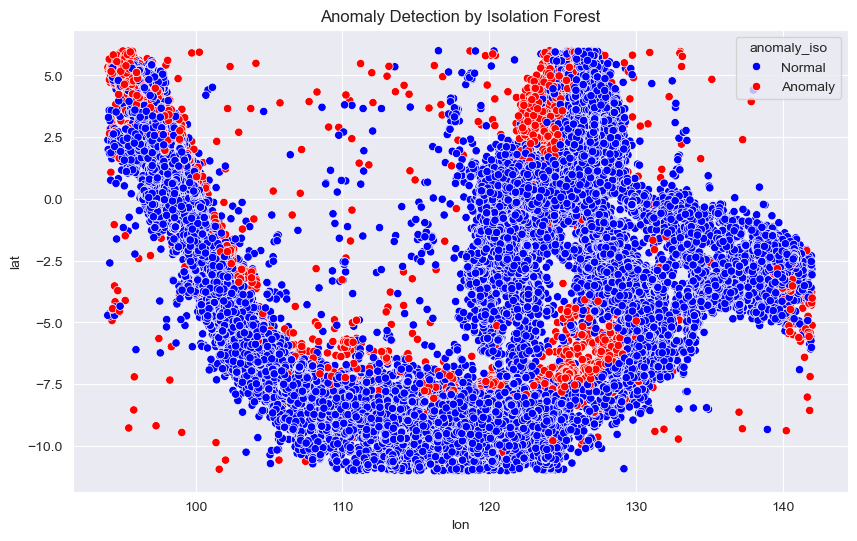

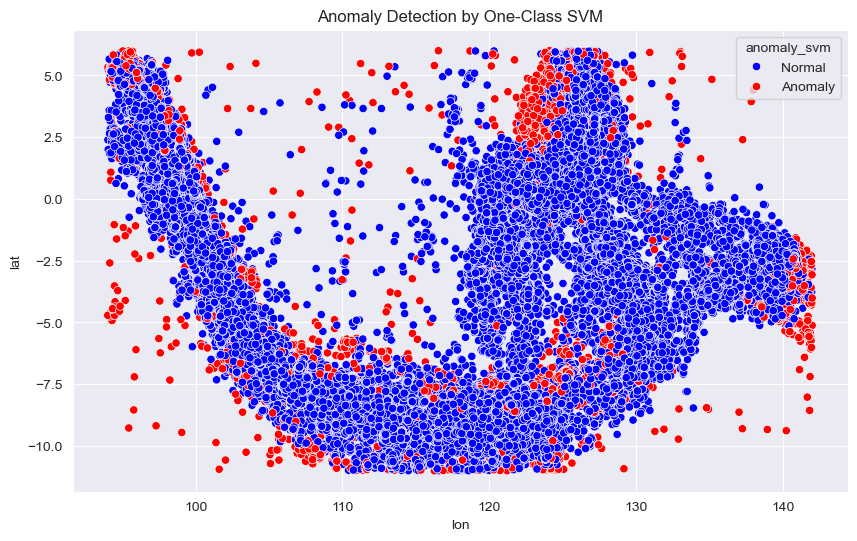

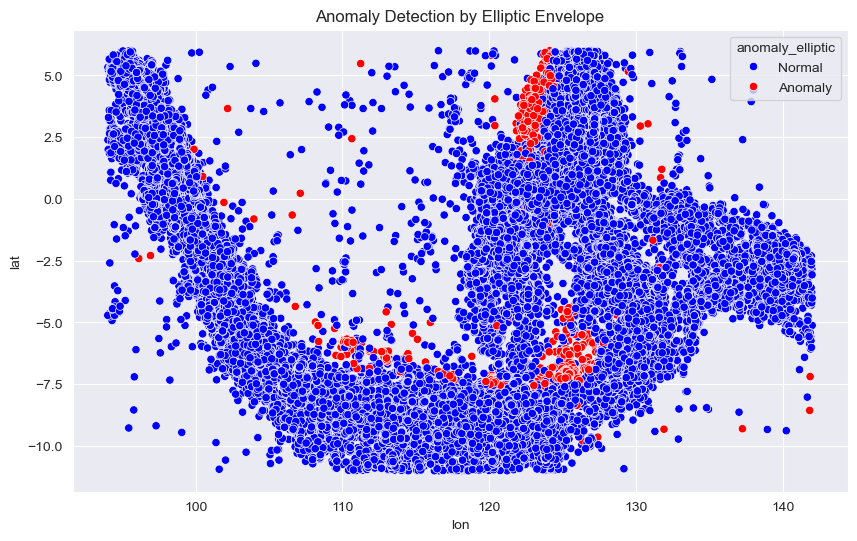

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot anomalies detected by Isolation Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lon', y='lat', hue='anomaly_iso', palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title('Anomaly Detection by Isolation Forest')
plt.show()

# Plot anomalies detected by One-Class SVM
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lon', y='lat', hue='anomaly_svm', palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title('Anomaly Detection by One-Class SVM')
plt.show()

# Plot anomalies detected by Elliptic Envelope
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lon', y='lat', hue='anomaly_elliptic', palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title('Anomaly Detection by Elliptic Envelope')
plt.show()


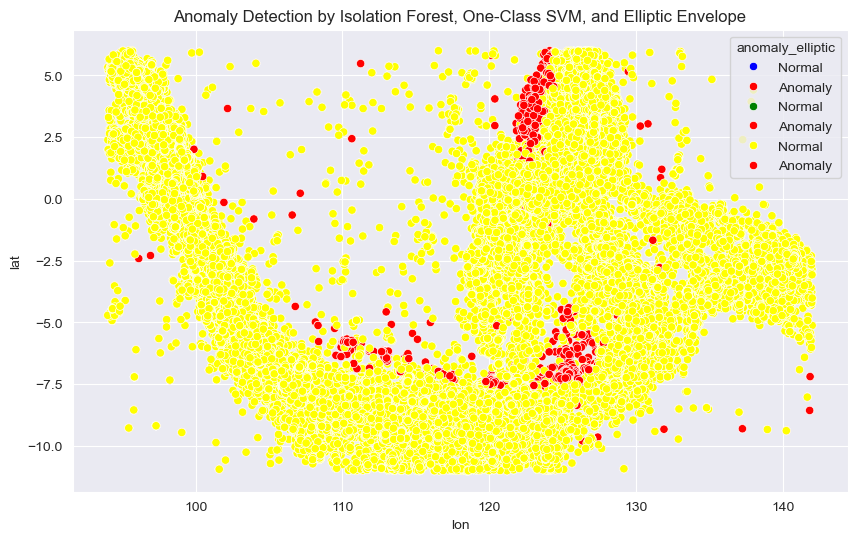

In [16]:
# Plot anomalies detected by all three models
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lon', y='lat', hue='anomaly_iso', palette={'Normal': 'blue', 'Anomaly': 'red'})
sns.scatterplot(data=df, x='lon', y='lat', hue='anomaly_svm', palette={'Normal': 'green', 'Anomaly': 'red'})
sns.scatterplot(data=df, x='lon', y='lat', hue='anomaly_elliptic', palette={'Normal': 'yellow', 'Anomaly': 'red'})
plt.title('Anomaly Detection by Isolation Forest, One-Class SVM, and Elliptic Envelope')
plt.show()


# Conclusion

1. It appears that Elliptic Envelope is more selective and focuses on the most extreme cases, which can be useful when we're trying to detect significant anomalies.

2. Our goal is to minimize false positives and only capture severe anomalies, Elliptic Envelope is indeed the best choice.

3. However, if we want a broader range of anomalies for further exploration or we're uncertain about the underlying distribution of our data, it's worth keeping Isolation Forest and One-Class SVM in mind as complementary approaches.

4. In practice, it's often a good idea to combine multiple anomaly detection models to get a more comprehensive view of the data and reduce the risk of missing important anomalies.

5. In this case, we can use Elliptic Envelope to capture the most severe anomalies and then use Isolation Forest and One-Class SVM to capture a broader range of anomalies for further investigation.

6. By combining these models, we can create a more robust anomaly detection system that can adapt to different types of anomalies and provide more reliable results.